#### Uber Demand and Supply Case Study

An analytical approach to solving the demand and supply gap because of driver cancellation and non-availability of cars. Analysis of the root-causes and possible hypotheses of the problems and recommended ways to tackle them.

In [266]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [267]:
# Import the numpy, pandas and matplotlib packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###### Step 1: Reading and Inspection

In [268]:
#Importing the csv file Uber Request Data.csv
uber_df=pd.read_csv("Uber Request Data.csv")


In [269]:
#Inspecting the data
uber_df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [270]:
uber_df.shape

(6745, 6)

In [271]:
uber_df.columns
# We see column names have spaces in their name; Renaming for efficient coding.

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [272]:
# We see column names have spaces in their name; Renaming for efficient coding
uber_df = uber_df.rename(columns={'Request id': 'Request_id', 'Pickup point': 'Pickup_point', 'Driver id' : 'Driver_id', 'Request timestamp' : 'Request_timestamp', 'Drop timestamp':'Drop_timestamp'})

In [273]:
uber_df.columns

Index(['Request_id', 'Pickup_point', 'Driver_id', 'Status',
       'Request_timestamp', 'Drop_timestamp'],
      dtype='object')

###### Step 2: Data Cleaning and Missing Values analysis

In [274]:
print(type(uber_df))

<class 'pandas.core.frame.DataFrame'>


In [275]:
#Finding the number of null values in each column of the given dataset
uber_df.isnull().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

In [276]:
#Finding the number of null values in each row of the given dataset
uber_df.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
6715    2
6716    2
6717    2
6718    2
6719    2
6720    2
6721    2
6722    2
6723    2
6724    2
6725    2
6726    2
6727    2
6728    2
6729    2
6730    2
6731    2
6732    2
6733    2
6734    2
6735    2
6736    2
6737    2
6738    2
6739    2
6740    2
6741    2
6742    2
6743    2
6744    2
Length: 6745, dtype: int64

In [278]:
#We see that there are null values in both columns and rows; Now calculating percentages.
#Null values in the rows is not significant for the analysis.
print(100*(uber_df.isnull().sum(axis = 0)/len(uber_df.index)))

# Inference : There are high number of null values in the Driver_id and Drop_timestamp. We will be analysing the cause
#             for the same later in the analysis.

Request_id            0.000000
Pickup_point          0.000000
Driver_id            39.288362
Status                0.000000
Request_timestamp     0.000000
Drop_timestamp       58.028169
dtype: float64


In [279]:
#Finding if there are any ""(blank values) in each column of the dataset

uber_df[uber_df['Pickup_point'] == " "].index
uber_df[uber_df['Status'] == " "].index
uber_df[uber_df['Request_timestamp'] == " "].index

# Inference : There seems to be no blank values in the object type columns

Int64Index([], dtype='int64')

In [280]:
# Now counting the number of trips that didn't complete as for them the Drop_timestamp column value will be NULL.

In [281]:
uber_df.groupby(['Status']).size() # By Number

Status
Cancelled            1264
No Cars Available    2650
Trip Completed       2831
dtype: int64

In [282]:
# By percentage it is nearly 58% of the trips; Also null value percentage for Drop_timestamp column is 58%.
(uber_df['Status'].value_counts(normalize=True) * 100)[["No Cars Available", "Cancelled"]].sum()
# Inference : The Drop_timestamp NAs are because the trips did not complete.

58.02816901408451

In [285]:
# Now checking the relation between Driver_id null values an other columns
# Checking by Status column of the dataset
(uber_df['Status'].value_counts(normalize=True) * 100)[["No Cars Available"]].sum()
# The Driver_id NAs percentage is approximately 39%, so is the percentage of trips with "No Cars Available" status.
# Inference: Driver_id has null values because cars were not available.

39.288361749444036

In [284]:
  #### Final Conclusions from Data Cleaning Process ###
    # 1. There are null values in the dataset
    # 2. There are no blank spaces in the dataset
    # 3. Drop_timetamp has null values for status as cancelled or no cars available
    # 4. Driver_id has null values for status as no cars available

###### Step 3: Standardizing Data

In [286]:
# Converting certain columns to object-type, to maintain consistency in plotting in the later stages
uber_df = uber_df.astype(object)
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request_id           6745 non-null object
Pickup_point         6745 non-null object
Driver_id            4095 non-null object
Status               6745 non-null object
Request_timestamp    6745 non-null object
Drop_timestamp       2831 non-null object
dtypes: object(6)
memory usage: 316.2+ KB


In [288]:
# As per the dataset, the date values in the Request_timestamp and Drop_timestamp is not consistent.
# Creating a consistent date format across the two columns.
uber_df['Request_timestamp']= pd.to_datetime(uber_df['Request_timestamp'], dayfirst= True)
uber_df['Drop_timestamp']= pd.to_datetime(uber_df['Drop_timestamp'], dayfirst= True)
uber_df


,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00


###### Step 4: Derived Metrics
A. Type Driven Metrics

In [289]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request_id           6745 non-null object
Pickup_point         6745 non-null object
Driver_id            4095 non-null object
Status               6745 non-null object
Request_timestamp    6745 non-null datetime64[ns]
Drop_timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 316.2+ KB


In [290]:
# Calculating creating date and hour as separate columns extracting values from Drop and Request Timestamps.

uber_df['Drop_date'] = uber_df['Drop_timestamp'].dt.date
uber_df['Request_date'] = uber_df['Request_timestamp'].dt.date
uber_df['Drop_hour']= uber_df['Drop_timestamp'].dt.hour
uber_df['Request_hour']= uber_df['Request_timestamp'].dt.hour

In [291]:
uber_df.columns # 10 columns in total now.

Index(['Request_id', 'Pickup_point', 'Driver_id', 'Status',
       'Request_timestamp', 'Drop_timestamp', 'Drop_date', 'Request_date',
       'Drop_hour', 'Request_hour'],
      dtype='object')

In [292]:
#Checking for unique value in the date columns. We see that there are 6 dates for which the data is available.
(uber_df.Drop_date.unique())


array([datetime.date(2016, 7, 11), datetime.date(2016, 7, 12),
       datetime.date(2016, 7, 13), datetime.date(2016, 7, 14),
       datetime.date(2016, 7, 15), datetime.date(2016, 7, 16), nan],
      dtype=object)

In [239]:
uber_df.Request_date.unique()

array([datetime.date(2016, 7, 11), datetime.date(2016, 7, 12),
       datetime.date(2016, 7, 13), datetime.date(2016, 7, 14),
       datetime.date(2016, 7, 15)], dtype=object)

In [240]:
# Checking unique values in the hour columns. We see that there were trips in every hour of a particular date.
np.sort(uber_df.Drop_hour.unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., nan])

In [241]:
np.sort(uber_df.Request_hour.unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

B. Business Driven Metrics

In [293]:
#Calculating Trip Time by computing difference between Drop Time and Request Time Column
uber_df['Trip_time']=(uber_df.Drop_timestamp-uber_df.Request_timestamp).astype('timedelta64[h]')

uber_df.Trip_time
uber_df.Trip_time.isnull().sum()
#Inference: The number of null values are the same as Drop Timestamp Column; Hence the computation of Trip Time is correct.

3914

###### Step 5: Univariate Analysis

In [294]:
#1) Request_id
# The values in this column should be unique
np.sort(uber_df.Request_id.unique())
       
# Inference : Only unique values present. The maximum value is 6766.

array([1, 2, 3, ..., 6764, 6765, 6766], dtype=object)

In [244]:
uber_df.Request_id.shape 
# Inference : We see there are 6745 values in the Request id column but there are 6766 unique values; Can be inferred that there are some
#missing values. There are 6766-6745=21 missing values.

(6745,)

In [295]:
#2) Analysing Pickup_point distribution between City and Airport.

print((uber_df['Pickup_point'].value_counts(normalize=True) * 100))

# Inference : We see nearly equal distrubution of Pickup_point values; That is around 50%


City       51.99407
Airport    48.00593
Name: Pickup_point, dtype: float64


In [296]:
#3)Status
print((uber_df['Status'].value_counts(normalize=True) * 100))
# Inference : Aprroximately 39% trips have status as "No Cars Available"
#            Also the percentage of trips cancelled is also quite high
#            Further investigation will be done based on Pickup_points and hours

Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: Status, dtype: float64


In [297]:
#4)Request_date
uber_df.groupby(['Request_date']).size()

# Inference : We see that the number of trips each day is nearly the same. 

Request_date
2016-07-11    1367
2016-07-12    1307
2016-07-13    1337
2016-07-14    1353
2016-07-15    1381
dtype: int64

In [298]:
uber_df.columns

Index(['Request_id', 'Pickup_point', 'Driver_id', 'Status',
       'Request_timestamp', 'Drop_timestamp', 'Drop_date', 'Request_date',
       'Drop_hour', 'Request_hour', 'Trip_time'],
      dtype='object')

In [299]:
#Creating a column Time_of_day based on hour of the day to analyse peak times at which cabs are in demand.
conditions = [
    (uber_df['Request_hour'] >=0) & (uber_df['Request_hour'] <=4),
    (uber_df['Request_hour'] >=5) & (uber_df['Request_hour'] <=9),
    (uber_df['Request_hour'] >=10) & (uber_df['Request_hour'] <=16),
    (uber_df['Request_hour'] >=17) & (uber_df['Request_hour'] <=20),
    (uber_df['Request_hour'] >=21) & (uber_df['Request_hour'] <=23)]
choices = ['Midnight', 'Morning', 'Day', 'Evening', 'Night']
uber_df['Time_of_day'] = np.select(conditions, choices)


In [300]:
uber_df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Drop_date,Request_date,Drop_hour,Request_hour,Trip_time,Time_of_day
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,2016-07-11,13.0,11,1.0,Day
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,2016-07-11,18.0,17,0.0,Evening
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,2016-07-12,9.0,9,0.0,Morning
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,2016-07-12,22.0,21,0.0,Night
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,2016-07-13,9.0,8,0.0,Morning


Text(0.5,1,'Count of requests made in different times of a day')

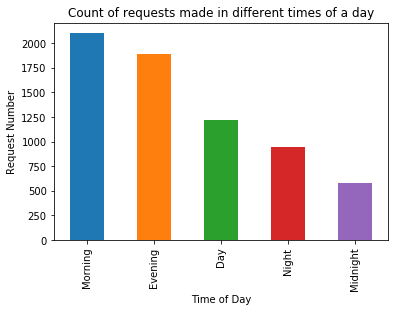

In [301]:
# Plotting number of trips based on time
uber_df.Time_of_day.value_counts().plot.bar()

plt.xlabel("Time of Day")
plt.ylabel("Request Number")
plt.title("Count of requests made in different times of a day")
# Inference : The demand of cabs was on the higher side in the morning and evening time

###### Step 6: Segmented Univariate Analysis and Bivariate Analyis;
###### Analysis for the problem at the airport.

In [302]:
uber_df.head()


,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,Drop_date,Request_date,Drop_hour,Request_hour,Trip_time,Time_of_day
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,2016-07-11,13.0,11,1.0,Day
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,2016-07-11,18.0,17,0.0,Evening
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,2016-07-12,9.0,9,0.0,Morning
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,2016-07-12,22.0,21,0.0,Night
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,2016-07-13,9.0,8,0.0,Morning


Text(0.5,1,'Count of cabs requested at different dates')

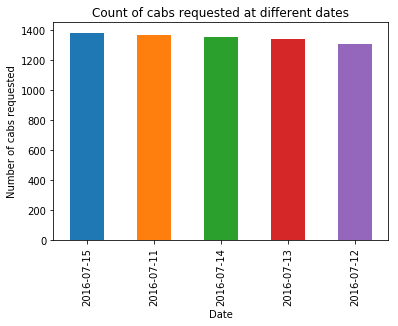

In [303]:
# plot for the distribution of cab requests over the dates.
uber_df.Request_date.value_counts().plot.bar()

# Inference : It can be seen that the number of cabs requested each day is approximately the same.
#             So, the average number of cabs requested each day can be taken as an average of below data i.e.., 1349 trips per day.
uber_df.groupby(['Request_date']).size().mean()
plt.xlabel("Date")
plt.ylabel("Number of cabs requested")
plt.title("Count of cabs requested at different dates")

Text(0.5,1,'Demand of Cabs at the Airport')

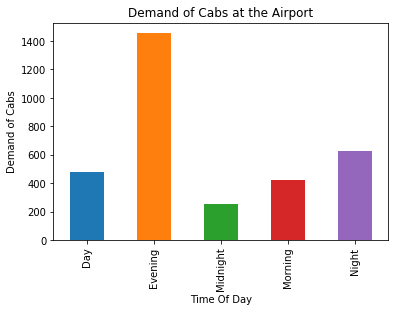

In [304]:
# Now, analysisng demand at the airport, that is the sum of trips completed, cancelled and unavailability of cars.
#The analysis will be done based on time of the day.

df_AD=uber_df[uber_df.Pickup_point=="Airport"].groupby(['Time_of_day']).count().Status
df_AD.plot.bar()

plt.xlabel("Time Of Day")
plt.ylabel("Demand of Cabs")
plt.title("Demand of Cabs at the Airport")

#Inference : It can be seen that the demand of cabs at the airport is the highest in the evening time.

Text(0.5,1,'Supply of Cabs at the Airport')

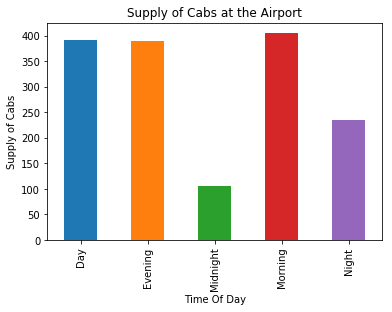

In [305]:
# Now analysing the supply of cabs at the airport, which will be equivalent to number of trips completed as well as cancelled.
df_AS=uber_df[(uber_df.Pickup_point=="Airport") & (uber_df['Status'] != 'No Cars Available')].groupby(['Time_of_day']).count().Status
df_AS.plot.bar()
plt.xlabel("Time Of Day")
plt.ylabel("Supply of Cabs")
plt.title("Supply of Cabs at the Airport")

# The numbers here would not matter until and unless we calculate the gap between the demand and supply at the airport by 
# the time of day. 

Text(0.5,1,'Demand-Supply  Gap of Cabs at the Airport')

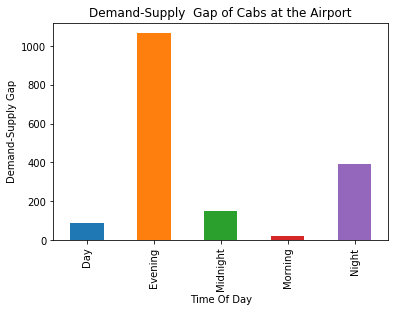

In [306]:
#Calculating the gap between demand and supply at the airport.
(df_AD- df_AS).plot.bar()
plt.xlabel("Time Of Day")
plt.ylabel("Demand-Supply Gap")
plt.title("Demand-Supply  Gap of Cabs at the Airport")
# Inference: As expected the demand-supply gap at the airport is the greatest in the evening. 
#            Uber should increase the number of cars available at the airport at first in the evening times 
#            and further in the night time.


Text(0.5,1,'Breakdown of number of cabs on the basis of their Status at the Airport')

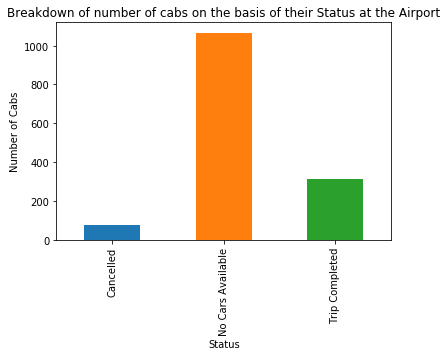

In [312]:
#Further analysing the evening rush in the airport; Probable Reasons and optimum suggestions to tackle the problem at hand.
#Analysisng the reason for high demand at the airport.
# A total of 1457 cabs are in demand in the evening time at the airport. 
# Calculating the breakup based on the status.
((uber_df[(uber_df.Pickup_point=="Airport") & (uber_df.Time_of_day=='Evening')]).groupby(['Status']).size()).plot.bar()

plt.xlabel("Status")
plt.ylabel("Number of Cabs")
plt.title("Breakdown of number of cabs on the basis of their Status at the Airport")

# Inference : Below graph shows that the biggest issue to be addressed at the airport is that of non-availability of Cars 
#             in the evening time.

Text(0.5,1,'Demand of Cabs at the City')

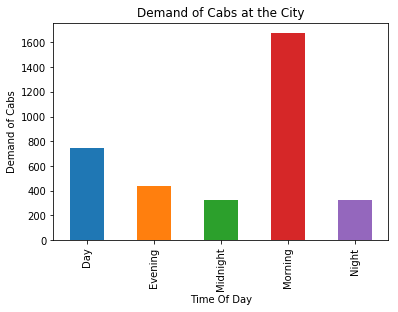

In [308]:
# Similar analysis for Pickup_point as City. Calculating Demand and Supply Gap in the City Area.
df_CD=uber_df[uber_df.Pickup_point=="City"].groupby(['Time_of_day']).count().Status
df_CD.plot.bar()

plt.xlabel("Time Of Day")
plt.ylabel("Demand of Cabs")
plt.title("Demand of Cabs at the City")
# Inference : We can see from the below graph that the demand of cabs in the city area is the highest in the morning times.
#             For further insights, we will calculate supply of cabs in the city area.

Text(0.5,1,'Supply of Cabs at the City')

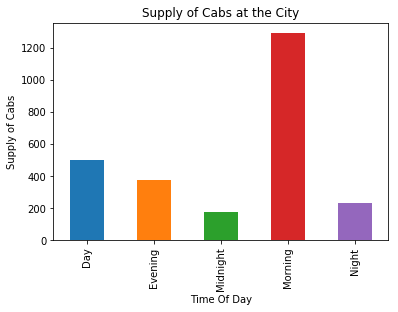

In [313]:
# Now analysing the supply of cabs at the city, which will be equivalent to number of trips completed as well as cancelled.
df_CS=uber_df[(uber_df.Pickup_point=="City") & (uber_df['Status'] != 'No Cars Available')].groupby(['Time_of_day']).count().Status
df_CS.plot.bar()
plt.xlabel("Time Of Day")
plt.ylabel("Supply of Cabs")
plt.title("Supply of Cabs at the City")

# Here we see that the supply of cabs is high in the morning in the city area. Therefore, the situation is not similar to Airport.
# Further calculating the gap between demand and supply, for more insights.

Text(0.5,1,'Demand-Supply Gap of Cabs at the City')

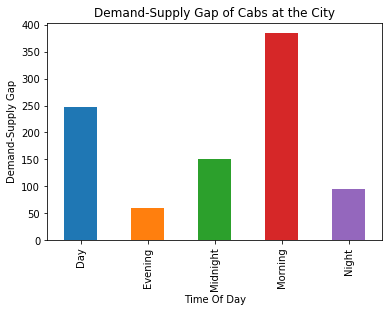

In [314]:
#Calculating the gap between demand and supply at the airport.
(df_CD- df_CS).plot.bar()
plt.xlabel("Time Of Day")
plt.ylabel("Demand-Supply Gap")
plt.title("Demand-Supply Gap of Cabs at the City")
# Inference : Though we see that the demand and supply both at the city is high in the morning, we also see the gap 
#             between them is also the highest in the morning. 

Text(0.5,1,'Breakdown of number of cabs on the basis of their Status at the Morning Time')

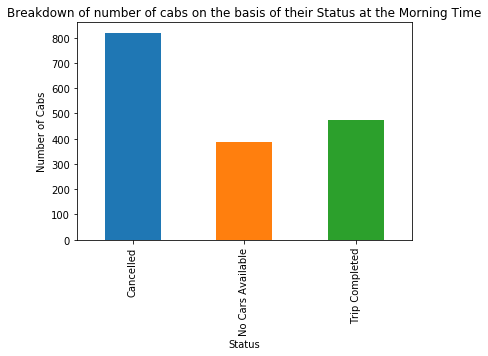

In [315]:
#Further analysing the high demand-supply gap at the city in the morning and day-time to find the root cause.
((uber_df[(uber_df.Pickup_point=="City") & (uber_df.Time_of_day=='Morning')]).groupby(['Status']).size()).plot.bar()

plt.xlabel("Status")
plt.ylabel("Number of Cabs")
plt.title("Breakdown of number of cabs on the basis of their Status at the Morning Time")

Text(0.5,1,'Breakdown of number of cabs on the basis of their Status at Daytime')

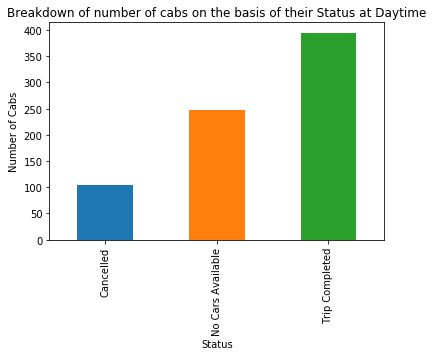

In [317]:
((uber_df[(uber_df.Pickup_point=="City") & (uber_df.Time_of_day=='Day')]).groupby(['Status']).size()).plot.bar()

plt.xlabel("Status")
plt.ylabel("Number of Cabs")
plt.title("Breakdown of number of cabs on the basis of their Status at Daytime")

# Inference : The high demand-supply gap in the city area is because of high number of trip cancellations.
#             The drivers might be cancelling trips from city to airport, because of high wait time at the airport for next
#             trip. Also the data for day-time is not as significant as the number of cancellations is less.

###### Final Conclusion:
1. Demand-Supply Gap--
        1. Significant Demand-Supply Gap for both pickup points
        2. The Demand-Supply Gap at the airport is greater than at the city area.
2. Reasons--
        1. At airport, major cause is non-availability of cabs
        2. At city, major cause is high number of car cancellations; May be because of high wait time at the airport for
        the next trip.
 3. Recommendation--
        1. Reach out to more number of drivers and strengthen the Uber network to increase availability of cars both at
        the airport and city
        2. Incentives and perks for drivers who wait for long times for trips or serve at odd times, so that number of
        trips cancelled by them is less.
        3. Add a tipping option like being done by a few food delivery apps. Will act as a motivation for the drivers  .
        4. Rewarding drivers on the basis of their ratings.
        5. Partnerships with various tech/business parks; employees can pool together for cost-efficient and safe
        commute.
